<a href="https://colab.research.google.com/github/alanabates/Social-Media-Analytics/blob/main/Twitter_Sentiment_Analysis_for_Chanel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Libraries
!pip install textblob
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pycountry
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=dc2f24de7e4f0213af9280f56f3cda2b119cf382e35a60670459bcc99e48a8f4
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 5.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=77f585b0b9ca4a34b26b3d8e0ea791ce717cdf41e78a8270de9cf847f1cb9812
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3af

In [ ]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Add Twitter API key and secret
consumer_key = 'RMUt9vdxsT55w3un4W47vRW1k'
consumer_secret = 'TkAaUvyPv1EXnaeJN55v2Twk9O6xFfHorASoEakqOSarOdPfFE'
# Handling authentication with Twitter
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
 
# Create a wrapper for the Twitter API
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = "chanel"
noOfTweet = 2500
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
 
 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score["neg"]
 neu = score["neu"]
 pos = score["pos"]
 comp = score["compound"]
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
   negative_list.append(tweet.text)
   negative += 1
 elif pos > neg:
    positive_list.append(tweet.text)
    positive += 1
 elif pos == neg:
    neutral_list.append(tweet.text)
    positive += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, ".1f")
neutral = format(neutral, ".1f")

In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2500
positive number:  527
negative number:  255
neutral number:  1718


NameError: ignored

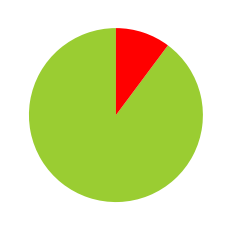

In [ ]:
#Creating PieCart
#labels = ['Positive [‘+str(positive)+’%]’ , ‘Neutral [‘+str(neutral)+’%]’,’Negative [‘+str(negative)+’%]']
#labels = ['Positive' positive ] #‘Neutral' = [‘Neutral]’,’Negative [‘+str(negative)+’%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for Chanel")
plt.axis('equal')
plt.show()

In [ ]:
tweet_list.drop_duplicates(inplace = True)

In [ ]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

tw_list.head(10)

,0,text
0,RT @Solphendukaa: Gents . What’s your favourit...,RT @Solphendukaa: Gents . What’s your favourit...
1,RT @OpRambo420: @YouTube i need a help please ...,RT @OpRambo420: @YouTube i need a help please ...
2,@YouTube i need a help please i was having 2 c...,@YouTube i need a help please i was having 2 c...
3,Chanel call me talking abt steak night,Chanel call me talking abt steak night
6,RT @nanakomatsupics: paris fashion week 21 jan...,RT @nanakomatsupics: paris fashion week 21 jan...
7,グレゴリオ聖歌: 入祭唱 \n主を信じるものに栄光あれ \n\nhttps://t.co/m...,グレゴリオ聖歌: 入祭唱 \n主を信じるものに栄光あれ \n\nhttps://t.co/m...
9,RT @dcconfidential: Days of Our Lives Recap: A...,RT @dcconfidential: Days of Our Lives Recap: A...
10,RT @bluembombo: @Solphendukaa You can never go...,RT @bluembombo: @Solphendukaa You can never go...
11,Every rakshabandhan I feed sad and depressed 😭...,Every rakshabandhan I feed sad and depressed 😭...
12,RT @_sprinklecookie: Chanel Ayan and the girls...,RT @_sprinklecookie: Chanel Ayan and the girls...


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 if neg > pos:
   tw_list.loc[index, 'sentiment'] = "negative"
 elif pos > neg:
   tw_list.loc[index, 'sentiment'] = "positive"
 else:
   tw_list.loc[index, 'sentiment'] = "neutral"
   tw_list.loc[index, 'neg'] = neg
   tw_list.loc[index, 'neu'] = neu
   tw_list.loc[index, 'pos'] = pos
   tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @Solphendukaa: Gents . What’s your favourit...,RT @Solphendukaa: Gents . What’s your favourit...,0.000,0.000,neutral,0.0,1.0,0.0,0.0
1,RT @OpRambo420: @YouTube i need a help please ...,RT @OpRambo420: @YouTube i need a help please ...,-0.125,0.375,positive,NaN,NaN,NaN,NaN
2,@YouTube i need a help please i was having 2 c...,@YouTube i need a help please i was having 2 c...,-0.125,0.375,positive,NaN,NaN,NaN,NaN
3,Chanel call me talking abt steak night,Chanel call me talking abt steak night,0.000,0.000,neutral,0.0,1.0,0.0,0.0
6,RT @nanakomatsupics: paris fashion week 21 jan...,RT @nanakomatsupics: paris fashion week 21 jan...,0.000,0.000,neutral,0.0,1.0,0.0,0.0
7,グレゴリオ聖歌: 入祭唱 \n主を信じるものに栄光あれ \n\nhttps://t.co/m...,グレゴリオ聖歌: 入祭唱 \n主を信じるものに栄光あれ \n\nhttps://t.co/m...,0.000,0.000,neutral,0.0,1.0,0.0,0.0
9,RT @dcconfidential: Days of Our Lives Recap: A...,RT @dcconfidential: Days of Our Lives Recap: A...,0.350,0.650,positive,NaN,NaN,NaN,NaN
10,RT @bluembombo: @Solphendukaa You can never go...,RT @bluembombo: @Solphendukaa You can never go...,-0.500,0.900,positive,NaN,NaN,NaN,NaN
11,Every rakshabandhan I feed sad and depressed 😭...,Every rakshabandhan I feed sad and depressed 😭...,0.050,1.000,negative,NaN,NaN,NaN,NaN
12,RT @_sprinklecookie: Chanel Ayan and the girls...,RT @_sprinklecookie: Chanel Ayan and the girls...,0.625,0.600,positive,NaN,NaN,NaN,NaN


In [ ]:
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,888,61.88
positive,347,24.18
negative,200,13.94


In [ ]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
def create_wordcloud(text):
 mask = np.array(Image.open("cloud.png"))
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color="white",
 mask = mask,
 max_words=3000,
 stopwords=stopwords,
 repeat=True)
 wc.generate(str(text))
 wc.to_file("wc.png")
 print("Word Cloud Saved Successfully")
 path="wc.png"
 display(Image.open(path))

In [ ]:
#Creating wordcloud for all tweets
#create_wordcloud(tw_list["text"].values)

Second one

In [ ]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 

In [ ]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = 'RMUt9vdxsT55w3un4W47vRW1k'
CONSUMER_SECRET = 'TkAaUvyPv1EXnaeJN55v2Twk9O6xFfHorASoEakqOSarOdPfFE'

# Access:
ACCESS_TOKEN  = '1556489477400379392-84lujnXgPE6yZUkRSf8RcXlzdOvH0c'
ACCESS_SECRET = 'iOFTSjKCQP7YfIoGA9ei5R1VPrlw5klgHSB08zeMKW6oO'

In [ ]:
# credentials

In [ ]:
# We import our access keys:
#from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [ ]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="lilyrosemeldepp",  q= "@CHANEL",count=500)
keyword = "chanel"
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5000 tweets:
print("5000 recent tweets:\n")
for tweet in tweets[:5000]:
    print(tweet.text)
    print()

Number of tweets extracted: 186.

5000 recent tweets:

Fuck @JaredLeto I need more Joker's seances.

Miss my girl😭😭😭 https://t.co/7T0j8FKpXm

RT @GiGiHadid: @KendallJenner love you more than you know

@ohhmyylesliee but not hotter then you

RT @mimichatter: .@LilyRoseMelDepp is making hair bonnets happen. Yeah girl, we see you! https://t.co/Fhx4OmhBth https://t.co/e5lehYggzs

RT @KylieJenner: Adele is breathtaking in her new video!

RT @GrdJournal: Elle a parlé !
Lily-Rose Depp a donné sa première interview à ID Magazine grâce à sa mère qui a fait l'intermédiaire. http:…

RT @ellesatin: #wcw 😩❤️ @LilyRoseMelDepp https://t.co/5JaxZy0RhX

RT @MelanyElleBeer: @LilyRoseMelDepp you should to speak french more often 😍😍😍 https://t.co/SOyA45Tm4c

RT @CRFASHIONBOOK: "Karl really knows how to bring out the best in someone."—@LilyRoseMelDepp http://t.co/2tucYP9yRd

RT @ElleGirlRussia: @LilyRoseMelDepp получила первую большую роль в кино! 
http://t.co/WcyPLfu5Ww http://t.co/h8kOKAKPLV

Take shelte

In [ ]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets


In [ ]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [ ]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,she’s just stunning https://t.co/V6JQiwzO4I,43,1508292411902283779,2022-03-28 03:58:28,Twitter for iPhone,77,14
1,whitney &amp; grace! https://t.co/hfuhZVBbYp,44,1505894085995155465,2022-03-21 13:08:22,Twitter for iPhone,11,2
2,the women of gossip girl! https://t.co/DjCVpJBV0f,49,1505893782268805122,2022-03-21 13:07:10,Twitter for iPhone,15,5
3,whitney peak via instagram https://t.co/A29fHN...,50,1505892222709166084,2022-03-21 13:00:58,Twitter for iPhone,46,8
4,RT @gossipgirlfile: Whitney Peak is on set of ...,108,1503686104222171141,2022-03-15 10:54:39,Twitter for iPhone,0,49
5,RT @WhitneyPeak: https://t.co/ChFLUp7pQg,40,1503683612616855552,2022-03-15 10:44:44,Twitter for iPhone,0,3
6,RT @WhitneyPeak: chaotic energy today,37,1503683603854950402,2022-03-15 10:44:42,Twitter for iPhone,0,14
7,whitney peak has been cast for hocus pocus 2! ...,69,1449161849094639621,2021-10-15 23:54:43,Twitter for iPhone,23,3
8,"RT @FilmUpdates: EXCLU: Whitney Peak, Lilia Bu...",132,1449161148125749249,2021-10-15 23:51:56,Twitter for iPhone,0,301
9,she literally looks like an angel. https://t.c...,58,1449160534788481025,2021-10-15 23:49:30,Twitter for iPhone,29,7


In [ ]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 55.185929648241206


In [ ]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
whitney peak and savannah smith. #GossipGirl https://t.co/wEsM4BFjxD
Number of likes: 880
68 characters.

The tweet with more retweets is: 
RT @ssavannahsmith: this is my sister I’m not joking 📸 @WhitneyPeak @ziongmoreno https://t.co/jr46pVAOLw
Number of retweets: 689
104 characters.



In [ ]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

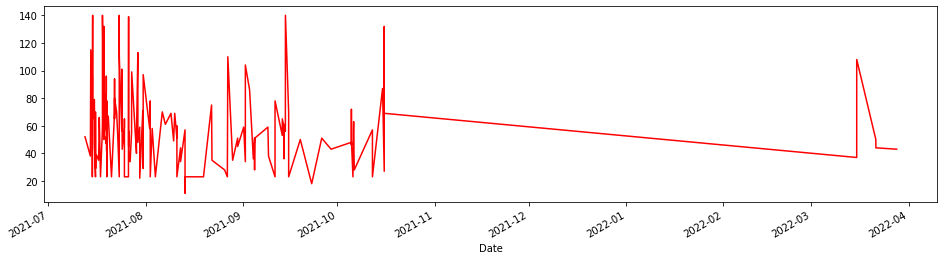

In [ ]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

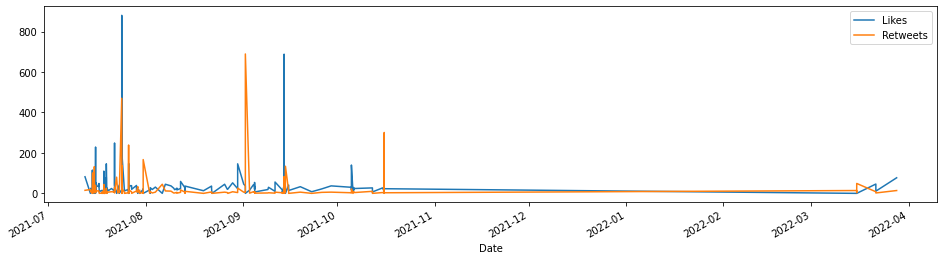

In [ ]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [ ]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone


In [ ]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [ ]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,she’s just stunning https://t.co/V6JQiwzO4I,43,1508292411902283779,2022-03-28 03:58:28,Twitter for iPhone,77,14,1
1,whitney &amp; grace! https://t.co/hfuhZVBbYp,44,1505894085995155465,2022-03-21 13:08:22,Twitter for iPhone,11,2,0
2,the women of gossip girl! https://t.co/DjCVpJBV0f,49,1505893782268805122,2022-03-21 13:07:10,Twitter for iPhone,15,5,0
3,whitney peak via instagram https://t.co/A29fHN...,50,1505892222709166084,2022-03-21 13:00:58,Twitter for iPhone,46,8,0
4,RT @gossipgirlfile: Whitney Peak is on set of ...,108,1503686104222171141,2022-03-15 10:54:39,Twitter for iPhone,0,49,0
5,RT @WhitneyPeak: https://t.co/ChFLUp7pQg,40,1503683612616855552,2022-03-15 10:44:44,Twitter for iPhone,0,3,0
6,RT @WhitneyPeak: chaotic energy today,37,1503683603854950402,2022-03-15 10:44:42,Twitter for iPhone,0,14,0
7,whitney peak has been cast for hocus pocus 2! ...,69,1449161849094639621,2021-10-15 23:54:43,Twitter for iPhone,23,3,0
8,"RT @FilmUpdates: EXCLU: Whitney Peak, Lilia Bu...",132,1449161148125749249,2021-10-15 23:51:56,Twitter for iPhone,0,301,0
9,she literally looks like an angel. https://t.c...,58,1449160534788481025,2021-10-15 23:49:30,Twitter for iPhone,29,7,0


In [ ]:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [ ]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 16.582914572864322%
Percentage of neutral tweets: 77.8894472361809%
Percentage of negative tweets: 5.527638190954774%
